In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
from n2lite import n2lite

%matplotlib inline
import matplotlib.pyplot
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

In [32]:
beam = ['2l','2r','3l','3r','4l','4r','5l','5r']

fn_hot_pm2 = '20181114_134205'
fn_hot_pm3 = '20181114_141123'
fn_hot_pm4 = '20181114_144822'
fn_hot_pm5 = '20181114_151245'

path_hot_pm2 = '/home/amigos/data/sql/hot_monitor/' + fn_hot_pm2 + '/param.db'
path_hot_pm3 = '/home/amigos/data/sql/hot_monitor/' + fn_hot_pm3 + '/param.db'
path_hot_pm4 = '/home/amigos/data/sql/hot_monitor/' + fn_hot_pm4 + '/param.db'
path_hot_pm5 = '/home/amigos/data/sql/hot_monitor/' + fn_hot_pm5 + '/param.db'

In [37]:
power = numpy.array([hot_pm2['power_1'], hot_pm2['power_2'],hot_pm3['power_1'],hot_pm3['power_2'],hot_pm4['power_1'],hot_pm4['power_2'],hot_pm5['power_1'],hot_pm5['power_2']])

In [41]:
# calc allan

dt = 1e-2 # 10 ms
roop = int(len(power[0]) / 4)

power0 = numpy.array(
    [
        (power[idx]/power[idx][0]).tolist()
        for idx in range(len(power))
    ]
)
time_allan =[
    [
        dt * i for i in range(roop)
    ]
    for _ in range(len(power0))
]
_allan = [
    [
        numpy.mean(numpy.split(_power0, numpy.arange(_roop, len(_power0), _roop))[:-1], axis=1)
        for _roop in range(1, roop + 1)
        ]
    for _power0 in power0
]
allan = [
    [
        numpy.var(__allan) for __allan in _allan[idx]
    ]
    for idx in range(len(power0))
]

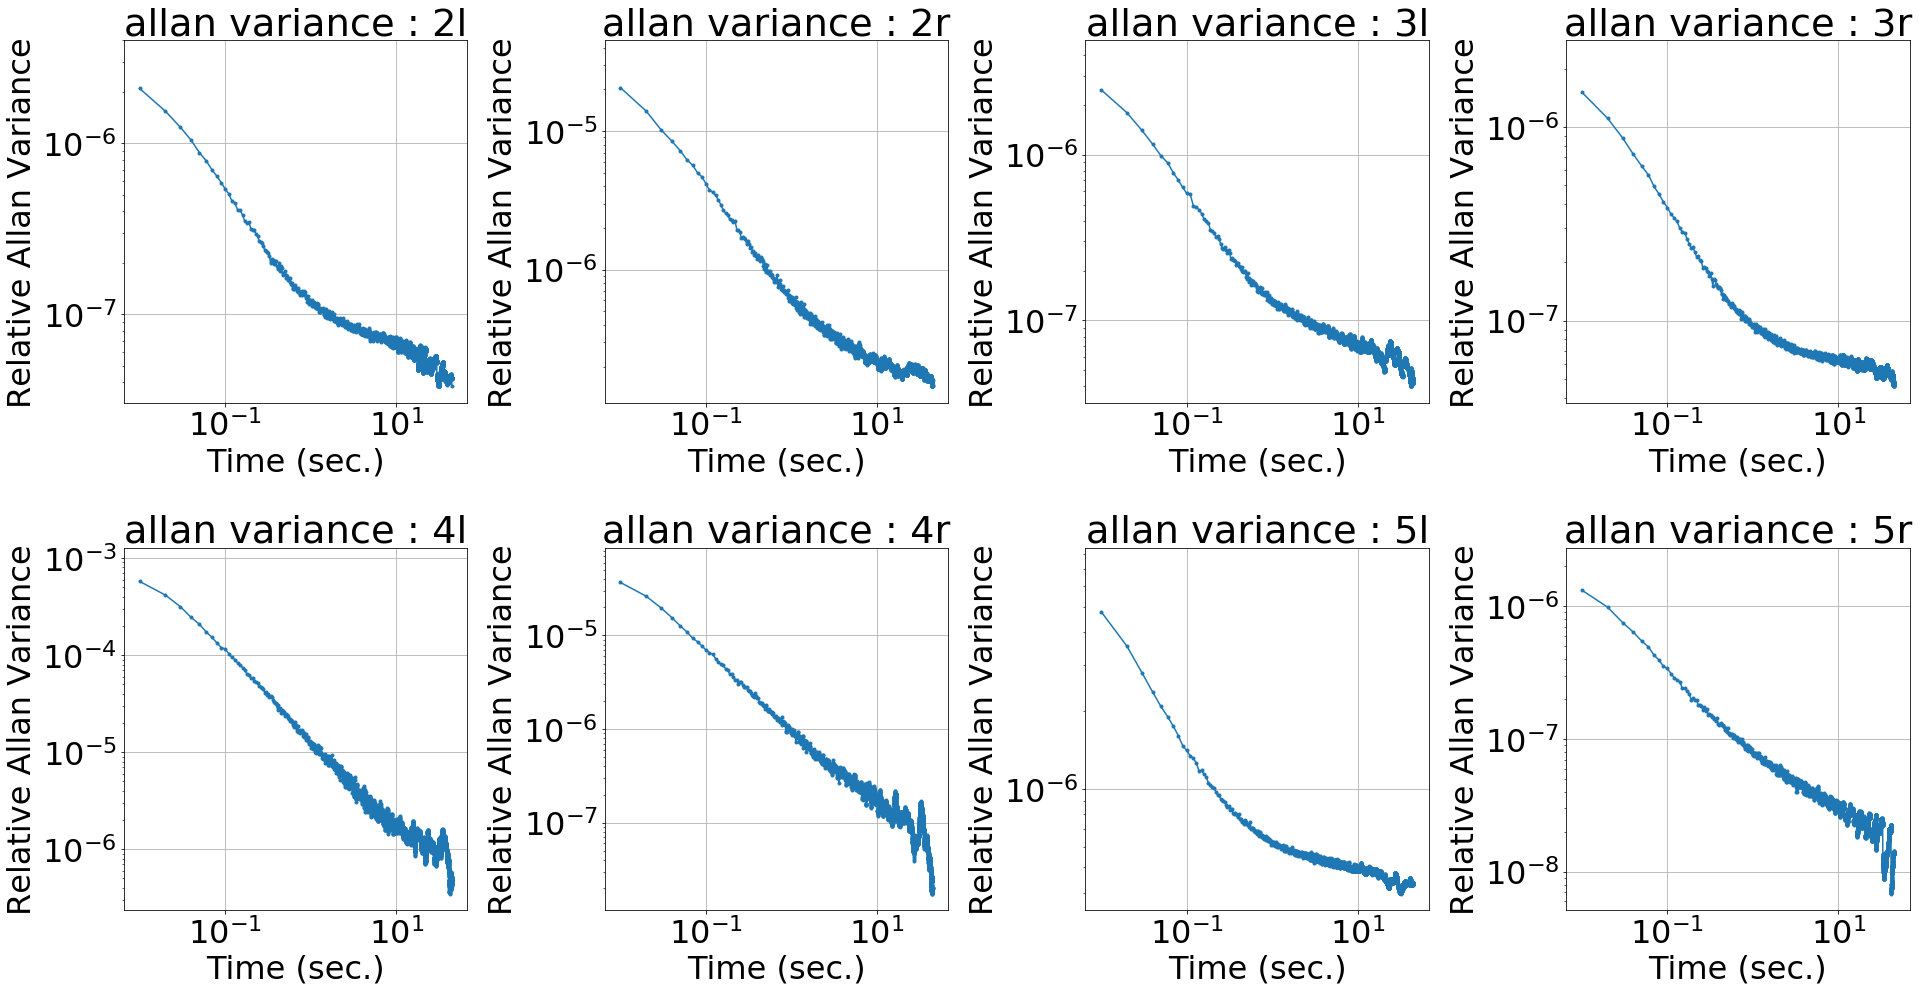

In [44]:
ncol = 4
nrow = 2
nax = ncol * nrow

figsize = (ncol * 8, nrow * 8)

matplotlib.rcParams['font.size'] = 32

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _time_allan, _d, _beam in zip(ax, time_allan, allan, beam):
    _ax.loglog(_time_allan, _d, '.-')
#     _ax.loglog(x, white_noise(x))
    _ax.grid()
    _ax.set_xlabel('Time (sec.)')
    _ax.set_ylabel('Relative Allan Variance')
    _ax.set_title('allan variance : {}'.format(_beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()